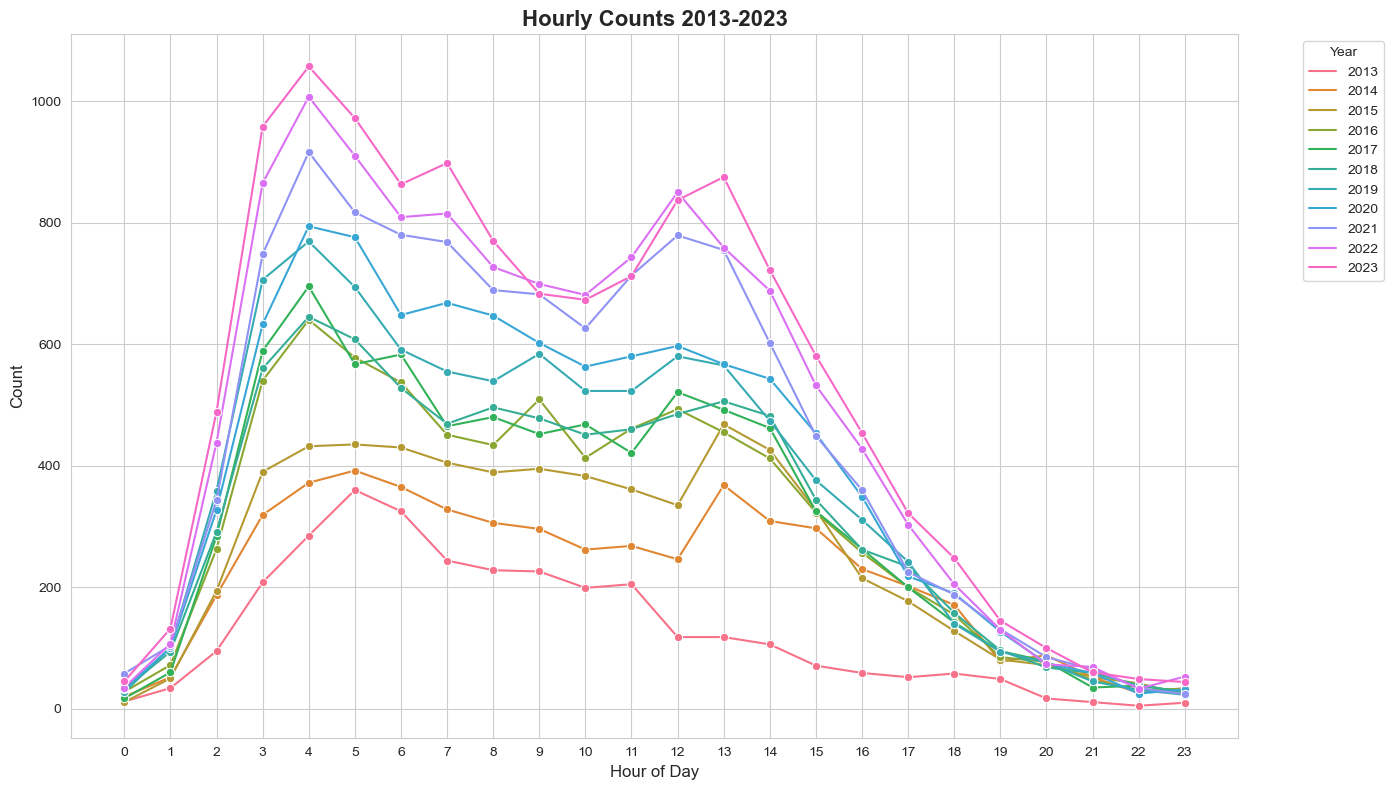

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the CSV data -- this is the csv generated by the time_of_day file
data = pd.read_csv('hour_counts.csv')

# Filter out the 'amount' and 'percent' rows from the data since they are not needed for the line plot
data_filtered = data[data['Year'].apply(lambda x: str(x).isdigit())]

# Melt the filtered data to long format for easier plotting with seaborn
data_long_filtered = data_filtered.melt(id_vars='Year', var_name='Hour', value_name='Count')
data_long_filtered['Hour'] = pd.to_numeric(data_long_filtered['Hour'])
data_long_filtered = data_long_filtered.sort_values(by=['Year', 'Hour'])

# Create the line plot without 'amount' and 'percent'
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_long_filtered, x='Hour', y='Count', hue='Year', marker='o')

sns.set_style('whitegrid')
plt.title('Hourly Counts 2013-2023', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))  # Set x-ticks to show every hour

plt.tight_layout()
plt.show()


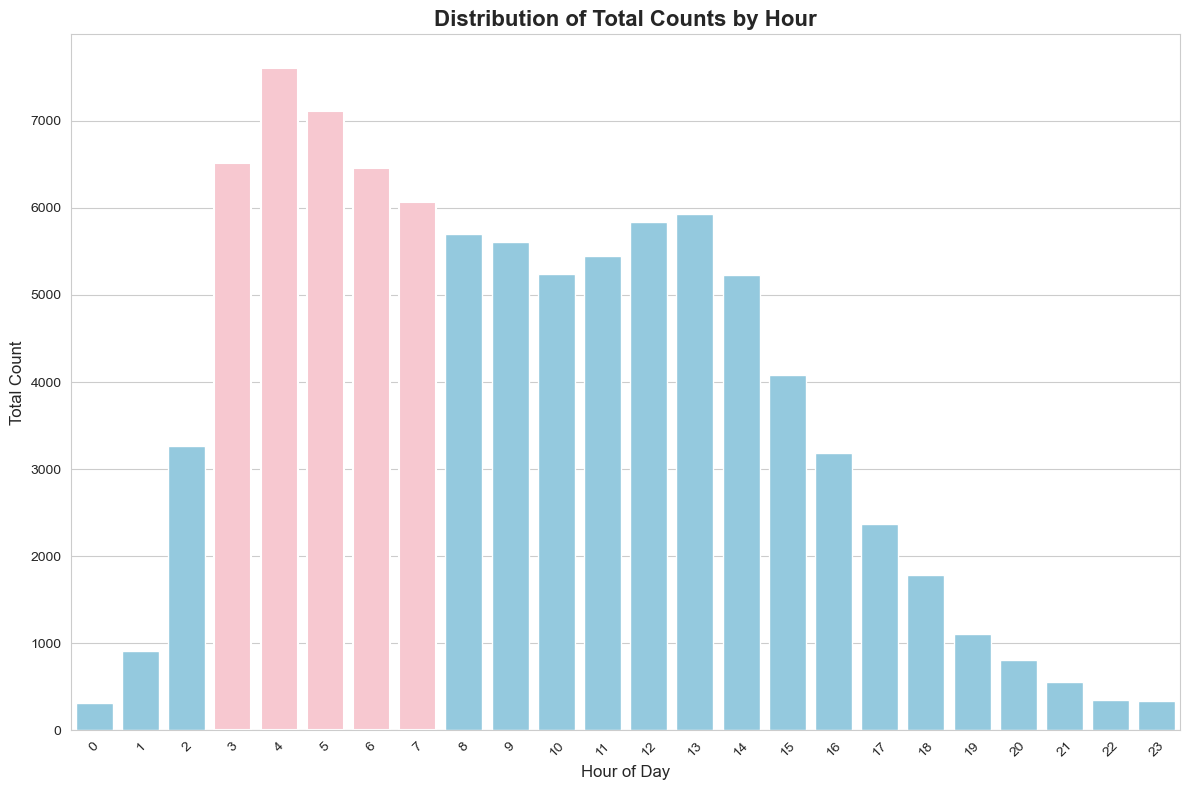

In [8]:
# Reorder the amount data to its original hour order
amount_data_ordered = data[data['Year'] == 'amount'].iloc[0, 1:]

# Identify the top 5 hours with the highest counts
top_hours = amount_data_ordered.sort_values(ascending=False).head(5).index

# Create a color list, where the top 5 hours are highlighted in a different color
bar_colors = ['pink' if hour in top_hours else 'skyblue' for hour in amount_data_ordered.index]

# Create the bar plot with highlighted top 5 hours
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=amount_data_ordered.index, y=amount_data_ordered.values, palette=bar_colors)

plt.title('Distribution of Total Counts by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Highlight the top 5 bars with a different color
for bar, hour in zip(bars.patches, amount_data_ordered.index):
    if hour in top_hours:
        bar.set_linewidth(1.5)

# Show the plot
plt.tight_layout()
plt.show()
